# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
ct = pd.crosstab(df.Year, df.Occupation, normalize='index')
ct = ct*100
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


# Part 2 — Recreate this explanatory visualization:

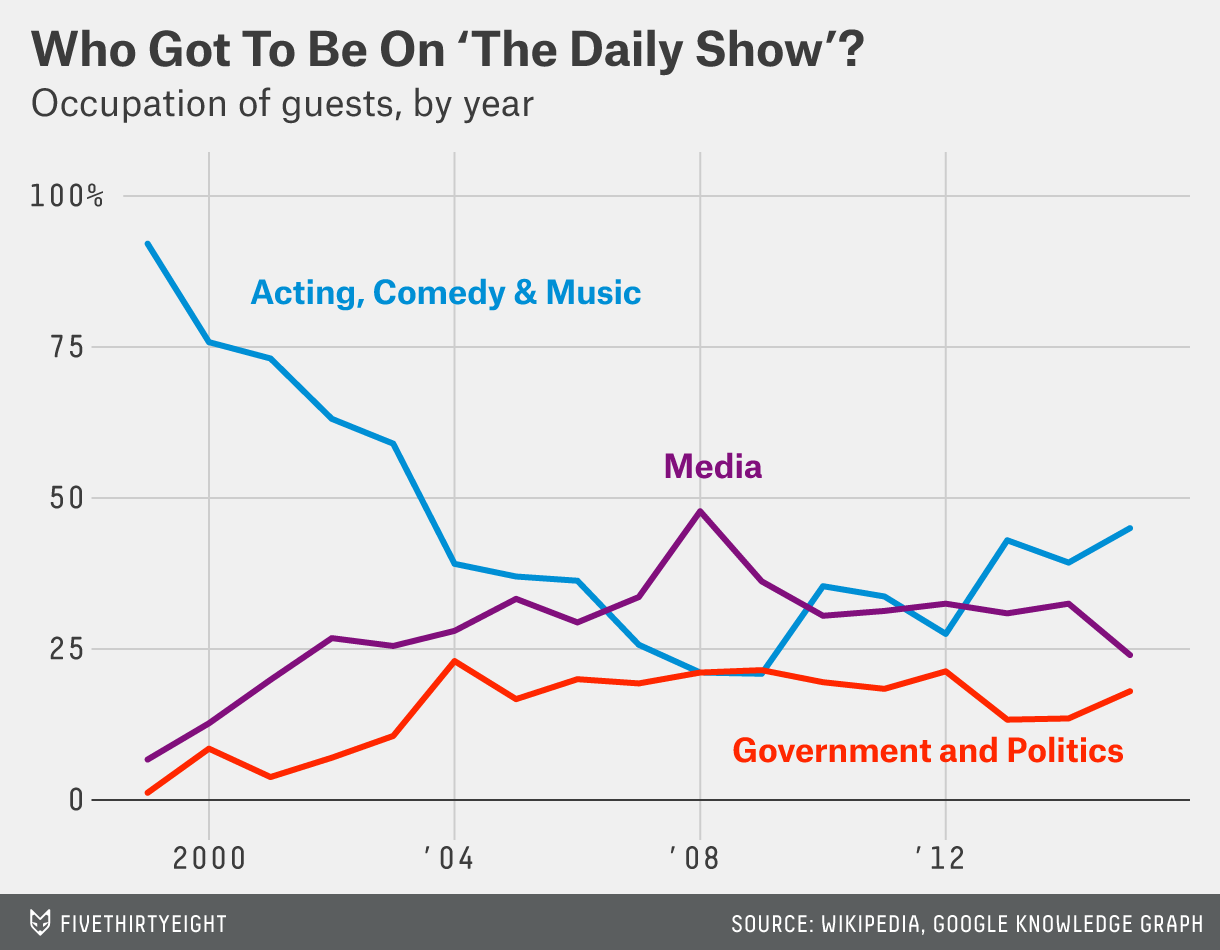

In [0]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [0]:
ct = ct.drop(columns=['Other'])

In [0]:
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795


In [0]:
year = ct.index.tolist()

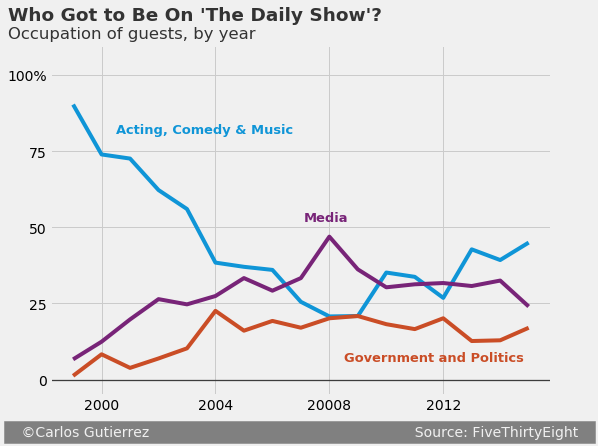

In [0]:
fig, ax = plt.subplots(figsize=(8,6))
    

    
# Plotting based all dates except those after Aug. 27 (exclude last 2 dates)
ax = sns.lineplot(x=year, y=ct['Acting, Comedy & Music'].tolist(), color='#0F95D7')
ax2 = sns.lineplot(x=year, y=ct['Government and Politics'].tolist(), color='#CA4D26')
ax3 = sns.lineplot(x=year, y=ct['Media'].tolist(), color='#782478')

# Removing spine lines all around plot
for key,spine in ax1.spines.items():
    spine.set_visible(False);

# Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
plt.ylim(-5,110)

# Bolded horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# Y-labels to only these
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14)

# X-labels based on x-axis values (first_thru_last)
# And changing label names
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '20008', '2012'], fontsize=14, color='black')

# Title and subtitle as text
ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='#333333')
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#333333')

# Text comments on graph
ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='#0F95D7')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=13, fontweight='semibold', color='#CA4D26')
ax.text(x=2007.1, y=52, s="Media", fontsize=13, fontweight='semibold', color='#782478')

# Line at bottom for signature line
ax.text(x = 1996.7, y = -18.5,
    s = '   ©Carlos Gutierrez                                                           Source: FiveThirtyEight   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey');

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.